# Election Data Analysis

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1. Who was being polled and what was their party affiliation?
2. Did the poll results favor Trump or Clinton?
3. How do undecided voters effect the poll?
4. Can we account for the undecided voters?
5. How did voter sentiment change over time?
6. Can we see an effect in the polls from the debates?



In [125]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

import requests # API
from io import StringIO

- The data for the polls will be obtained from HuffPost Pollster. You can check their website http://elections.huffingtonpost.com/pollster.

In [126]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

data = requests.get(url).text

poll_data = StringIO(data)

In [127]:
poll_df = pd.read_csv(poll_data)
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [128]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.2+ KB


In [129]:
poll_df.describe()

,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration
count,1013.000000,1522.00000,1522.000000,1098.000000,1460.000000,1522.000000
mean,1916.022705,40.64389,42.733903,5.806011,9.315068,1.216820
std,5050.240246,23.56639,25.298731,5.009533,6.253118,0.412214
min,59.000000,2.00000,1.000000,0.000000,0.000000,1.000000
25%,543.000000,32.00000,27.000000,3.000000,5.000000,1.000000
50%,894.000000,39.00000,42.000000,4.000000,8.000000,1.000000
75%,1281.000000,45.00000,50.000000,8.000000,12.000000,1.000000
max,70194.000000,93.00000,96.000000,34.000000,36.000000,2.000000


In [130]:
poll_df.columns

Index(['Pollster', 'Start Date', 'End Date', 'Entry Date/Time (ET)',
       'Number of Observations', 'Population', 'Mode', 'Trump', 'Clinton',
       'Other', 'Undecided', 'Pollster URL', 'Source URL', 'Partisan',
       'Affiliation', 'Question Text', 'Question Iteration'],
      dtype='object')

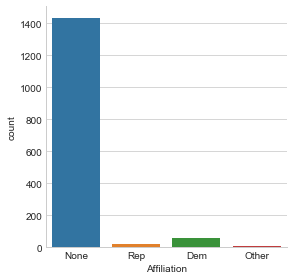

In [131]:
# Checking the affiliation and parisian
sns.factorplot('Affiliation', data=poll_df, kind="count")
plt.show()

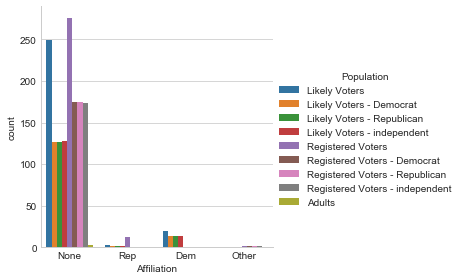

In [132]:
sns.factorplot('Affiliation', data=poll_df, kind='count', hue='Population')
plt.show()

**Results**
- Most people did not want to identify with any party
- People who weren't affilated with no party had a similar population
- Democrats and Repulicans were not outwardly backed

In [133]:
# Averages
avg = pd.DataFrame(poll_df.mean())

avg.drop(['Question Iteration', 'Number of Observations'], axis=0, inplace=True)
avg.head()

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068


In [134]:
# Standard Devation
std = pd.DataFrame(poll_df.std())

std.drop(['Number of Observations', 'Question Iteration'], axis=0, inplace=True)
std.head()

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118


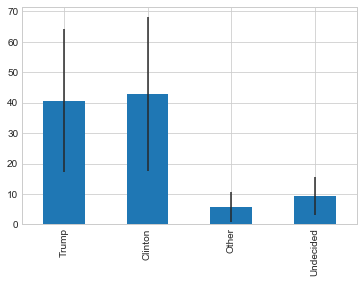

In [135]:
avg.plot(yerr=std, kind='bar', legend=False) # Y error means the black line on top of the bar graph


In [136]:
poll_std_avg = pd.concat([avg, std], axis=1)
poll_std_avg.columns = ['Average','Std. Deviation']
poll_std_avg

,Average,Std. Deviation
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


** Race is a pretty close between Trump and Clinton. Other and Undecided should be looked at more closely.**

In [137]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


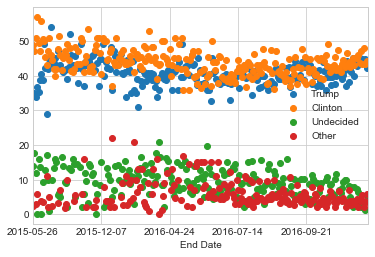

In [185]:
# A quick time-series about how people did vote for both of these candidates

end_date_df = poll_df.groupby(['End Date'], as_index=False).mean()

end_date_df.plot(x="End Date", y=['Trump','Clinton','Undecided', 'Other'], marker='o', linestyle='')
plt.show()

In [140]:
# For timestamps
from datetime import datetime

In [141]:
# Difference btw. both candidates
# Positive value: Clinton leads
# Negative value: Trump leads

poll_df['Difference'] = (poll_df.Clinton-poll_df.Trump)/100
poll_df.head(2)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.83


In [142]:
# Organize the data through start_date
# Looking at the mean

poll_start_df = poll_df.groupby(['Start Date'], as_index=False).mean()
poll_start_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,0.1425


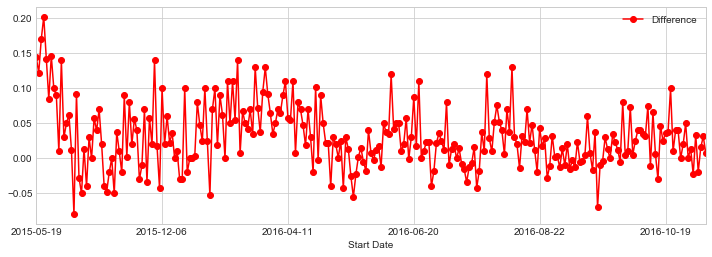

In [143]:
# Anything positive means that Clinton had a huge lead
# There are a couple of negative spikes indicating that Trump got a huge turnout in those dates

poll_start_df.plot(x='Start Date',y='Difference',figsize=(12,4), marker='o',linestyle='-', color='red')
plt.show()

In [144]:
# Finding those big negtative spike
poll_start_df.nsmallest(10,'Difference')

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
15,2015-08-21,3567.000000,54.000000,46.000000,NaN,NaN,1.000000,-0.080000
223,2016-09-20,1000.000000,44.750000,37.750000,5.000000,4.750000,1.000000,-0.070000
126,2016-05-19,1000.500000,43.750000,38.250000,NaN,18.000000,1.000000,-0.055000
69,2016-02-11,495.500000,46.750000,41.500000,NaN,12.500000,1.000000,-0.052500
18,2015-09-02,900.000000,45.000000,40.000000,NaN,16.000000,1.000000,-0.050000
31,2015-10-10,1004.000000,45.000000,40.000000,4.000000,10.000000,1.000000,-0.050000
28,2015-10-01,838.666667,46.000000,41.250000,NaN,12.750000,1.000000,-0.047500
122,2016-05-14,1146.333333,41.916667,37.666667,6.750000,9.583333,1.333333,-0.042500
49,2015-12-03,1023.500000,44.750000,40.500000,NaN,15.000000,1.000000,-0.042500
175,2016-07-22,1136.928571,43.758621,39.551724,3.470588,8.965517,1.413793,-0.042069


In [145]:
# Finding those big negtative spike
trump_dates = poll_start_df.nsmallest(5,'Difference')['Start Date']
trump_dates = list(trump_dates)

** Debates were September 26th, October 9, and October 19**

** Let look at the dates of the debate to see if they can provide any additional information**

In [146]:
def timeframe(year, month):
    row = 0
    xindex = []

    for date in poll_start_df['Start Date']:
        date = datetime.strptime(date, "%Y-%m-%d")
        if ((date.year == year) and (date.month == month)):
            xindex.append(row)
            row += 1
        else:
            row += 1

    return(min(xindex), max(xindex)) # Checking the range of the index that I will be using

In [147]:
# Narrow down the dates of late September and Mid October
year = 2016
month = 10

result = timeframe(year, month)

print("Max date is {0}. Min date is {1}".format(min(result), max(result)))

Max date is 232. Min date is 262


In [148]:
poll_start_df.loc[232:262].head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
232,2016-10-01,527.500000,42.250000,41.750000,4.750000,6.750000,1.0,-0.005000
233,2016-10-02,451.000000,37.000000,45.000000,3.000000,9.000000,1.0,0.080000
234,2016-10-03,12226.000000,42.900000,43.400000,4.333333,4.222222,1.1,0.005000
235,2016-10-04,1500.000000,42.000000,43.000000,4.000000,4.000000,1.0,0.010000
236,2016-10-05,827.666667,39.333333,46.666667,3.500000,5.000000,1.0,0.073333


In [149]:
poll_start_df.loc[232:262].tail()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
258,2016-10-27,1249.000000,47.000000,52.000000,NaN,1.000000,1.000000,0.050000
259,2016-10-28,1333.000000,44.125000,44.250000,5.000000,4.375000,1.500000,0.001250
260,2016-10-29,883.777778,41.333333,42.666667,4.600000,9.222222,1.444444,0.013333
261,2016-10-30,859.285714,45.714286,43.428571,3.714286,3.714286,1.000000,-0.022857
262,2016-10-31,30546.600000,45.200000,48.600000,3.333333,3.333333,1.400000,0.034000


In [150]:
# Dates of the debates, getting the index

sep26_df = poll_start_df[poll_start_df['Start Date'] == "2016-09-26"].index.values
oct9_df = poll_start_df[poll_start_df['Start Date'] == "2016-10-09"].index.values
oct19_df = poll_start_df[poll_start_df['Start Date'] == "2016-10-19"].index.values

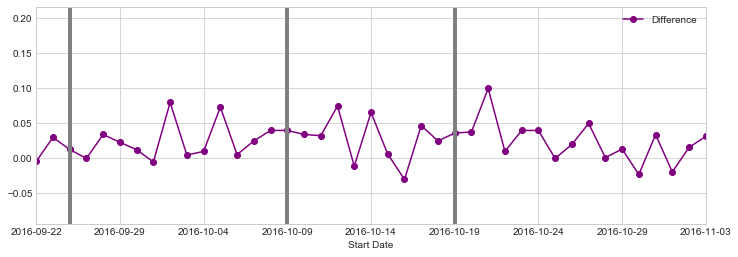

In [151]:
# Start with original figure
fig = poll_start_df.plot('Start Date','Difference',figsize=(12,4),
                         marker='o',linestyle='-',color='purple',xlim=(225,265))


# Now add the debate markers
plt.axvline(x=sep26_df, linewidth=4, color='grey')
plt.axvline(x=oct9_df, linewidth=4, color='grey')
plt.axvline(x=oct19_df, linewidth=4, color='grey')

**RESULTS**

- After the first debate, Trump continued to do better.
- After the second debate, nobody got an immediate change in their position.
- After the last debate, Clinton did better.

---

## Using the New York Times API

I created a script that takes the date and topic and output all the articles on the date

- Will find relevant articles that happened after the debate to check if we can find articles that have relevancy to the NY Times.

In [152]:
from nytimes import NYTimes

In [153]:
# Make you sure you include your desired dates
# Politics is the topics that it will look for

data = NYTimes(9,27,2016,"Politics")

These are the relevant topics: 
Headline: Trump on the Fed’s Motives  
 Website can be found: https://www.nytimes.com/video/us/politics/100000004674092/trump-on-the-feds-motives.html 

Headline: Trump and Clinton Discuss Alicia Machado  
 Website can be found: https://www.nytimes.com/video/us/politics/100000004674290/trump-and-clinton-discuss-alicia-machado.html 

Headline: Trump and Clinton Clash Over Trade  
 Website can be found: https://www.nytimes.com/video/us/politics/100000004674128/trump-and-clinton-clash-over-trade.html 

Headline: Fact-Checking the First Presidential Debate  
 Website can be found: https://www.nytimes.com/video/us/politics/100000004673274/fact-checking-the-first-presidential-debate.html 

Headline: Holt’s Moderation Gets Mixed Reviews  
 Website can be found: https://www.nytimes.com/video/us/politics/100000004673207/holts-moderation-gets-mixed-reviews.html 

Headline: Clinton Wary of Trump and Nuclear Arms  
 Website can be found: https://www.nytimes.com/vide

---

# Donor Data Set

The questions we will be trying to answer while looking at this Data Set is:

1. How much was donated and what was the average donation?
2. How did the donations differ between candidates?
3. How did the donations differ between Democrats and Republicans?
4. What were the demographics of the donors?
5. Is there a pattern to donation amounts?

In [154]:
# Set the DataFrame as the csv file of NEW YORK
donor_df = pd.read_csv('Election_Donar_NY.csv', low_memory=False, encoding='utf-8', index_col=None)

In [155]:
donor_df.shape

(649460, 18)

In [156]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 649460 entries, C00575795 to C00575795
Data columns (total 18 columns):
cmte_id              649460 non-null object
cand_id              649460 non-null object
cand_nm              649460 non-null object
contbr_nm            649456 non-null object
contbr_city          649460 non-null object
contbr_st            649377 non-null object
contbr_zip           560658 non-null object
contbr_employer      642406 non-null object
contbr_occupation    649460 non-null float64
contb_receipt_amt    649460 non-null object
contb_receipt_dt     8149 non-null object
receipt_desc         108347 non-null object
memo_cd              251346 non-null object
memo_text            649460 non-null object
form_tp              649460 non-null int64
file_num             649460 non-null object
tran_id              648770 non-null object
election_tp          0 non-null float64
dtypes: float64(2), int64(1), object(15)
memory usage: 94.1+ MB


In [157]:
donor_df.describe()

,contbr_occupation,form_tp,election_tp
count,6.494600e+05,6.494600e+05,0.0
mean,2.643009e+02,1.105477e+06,NaN
std,2.576947e+04,2.806734e+04,NaN
min,-1.010000e+04,1.003942e+06,NaN
25%,1.500000e+01,1.079445e+06,NaN
50%,2.700000e+01,1.104813e+06,NaN
75%,1.000000e+02,1.133832e+06,NaN
max,1.277771e+07,1.146285e+06,NaN


In [158]:
donor_df.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'],
      dtype='object')

In [159]:
donor_df.reset_index(inplace=True)
donor_df.columns = ['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp', 'delete']

In [160]:
del donor_df['delete']

In [161]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","JONES TAKATA, LOUISE",NEW YORK,NY,100162783,NaN,RETIRED,100.00,15-APR-16,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4732422,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CODY, ERIN",BUFFALO,NY,142221910,RUPP BAASE PFALZGRAF CUNNINGHAM LLC,ATTORNEY,66.95,24-APR-16,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4752463,P2016
2,C00577130,P60007168,"Sanders, Bernard","KEITH, SUSAN H",NEW YORK,NY,100133107,NOT EMPLOYED,NOT EMPLOYED,50.00,06-MAR-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKZ1KR1,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEPAGE, WILLIAM",BROOKLYN,NY,112381202,NEW YORK UNIVERSITY,UNDERGRADUATE ADMINISTRATOR,15.00,04-MAR-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWHRY0,P2016
4,C00575795,P00003392,"Clinton, Hillary Rodham","BIELAT, VEDORA",PLATTSBURGH,NY,129011729,INFORMATION REQUESTED,INFORMATION REQUESTED,100.00,12-APR-16,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4714688,P2016


In [162]:
# per amount of money
donor_df['contb_receipt_amt'].value_counts().head(10)

25.0      94311
50.0      72644
100.0     67365
10.0      55260
5.0       42681
15.0      28956
27.0      28112
250.0     26212
2700.0    12947
19.0      12348
Name: contb_receipt_amt, dtype: int64

In [163]:
don_rec_avg = donor_df['contb_receipt_amt'].mean()
don_rec_std = donor_df['contb_receipt_amt'].std()

print("The average is {0:.2f} and the standard deviation is {1:.2f}".format(don_rec_avg, don_rec_std))

The average is 264.30 and the standard deviation is 25769.47


- Notice how the standard deviation is VERY large compared to the mean

In [164]:
top_donor_df = donor_df['contb_receipt_amt'].copy()
top_donor_df.sort_values().head(10)

177328   -10100.0
408863    -9300.0
409141    -7300.0
6811      -6700.0
646922    -6579.0
408862    -6400.0
4559      -5400.0
353058    -5400.0
457735    -5400.0
4791      -5400.0
Name: contb_receipt_amt, dtype: float64

In [165]:
# NOTICE: There are huge negative values bc these are refunds
# We do not need this information
# this is why we have large stanard deviation

In [166]:
top_donor_df = top_donor_df[top_donor_df > 0] # only for positive values
top_donor_df.sort_values().head()

426236    0.01
405767    0.04
397171    0.04
151779    0.08
435352    0.09
Name: contb_receipt_amt, dtype: float64

In [167]:
# The top donation amount
top_donor_df.value_counts().head(10)

25.0      94311
50.0      72644
100.0     67365
10.0      55260
5.0       42681
15.0      28956
27.0      28112
250.0     26212
2700.0    12947
19.0      12348
Name: contb_receipt_amt, dtype: int64

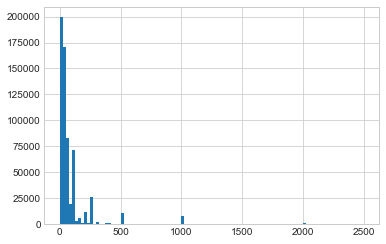

In [168]:
common_don = top_donor_df[top_donor_df < 2500] # within the largest donation, 2500 was the largest

common_don.hist(bins=100) # There are peaks that our shown with value_counts() as well

In [169]:
# Candidates of the election
candidate = donor_df['cand_nm'].unique()
candidate

array(['Clinton, Hillary Rodham', 'Sanders, Bernard', 'Trump, Donald J.',
       "O'Malley, Martin Joseph", "Cruz, Rafael Edward 'Ted'",
       'Walker, Scott', 'Bush, Jeb', 'Rubio, Marco', 'Kasich, John R.',
       'Christie, Christopher J.', 'Stein, Jill', 'Johnson, Gary',
       'Graham, Lindsey O.', 'Webb, James Henry Jr.',
       'Carson, Benjamin S.', 'Paul, Rand', 'Fiorina, Carly',
       'Santorum, Richard J.', 'Jindal, Bobby', 'Huckabee, Mike',
       'Pataki, George E.', 'Gilmore, James S III', 'Lessig, Lawrence',
       'Perry, James R. (Rick)', 'McMullin, Evan'], dtype=object)

In [170]:
# Dictionary of party affiliation
party_map = {'Clinton, Hillary Rodham': 'Democrat',
            'Sanders, Bernard': 'Democrat',
            'Trump, Donald J.': 'Republican',
            "O'Malley, Martin Joseph": 'Democrat',
            "Cruz, Rafael Edward 'Ted'": 'Republican',
            'Walker, Scott': 'Republican',
            'Bush, Jeb': 'Republican',
            'Rubio, Marco': 'Republican',
            'Christie, Christopher J.': 'Republican',
            'Stein, Jill': 'Green',
            'Johnson, Gary': 'Libertarian',
            'Graham, Lindsey O.': 'Republican',
            'Webb, James Henry Jr': 'Democrat',
            'Carson, Benjamin S.': 'Republican',
            'Paul, Rand': 'Republican',
            'Fiorina, Carly': 'Republican',
            'Santorum, Richard J.': 'Republican',
            'Jindal, Bobby': 'Republican',
            'Huckabee, Mike': 'Republican',
            'Pataki, George E.': 'Republican',
            'Gilmore, James S III': 'Republican',
            'Lessig, Lawrence': 'Democrat',
            'Perry, James R. (Rick)': 'Republican',
            'McMullin, Evan': 'Indepedent'
            }

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)


In [171]:
# Redo the procedure but updated with the party affiliation
donor_df = donor_df[donor_df.contb_receipt_amt > 0]


In [172]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,Party
0,C00575795,P00003392,"Clinton, Hillary Rodham","JONES TAKATA, LOUISE",NEW YORK,NY,100162783,NaN,RETIRED,100.00,15-APR-16,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4732422,P2016,Democrat
1,C00575795,P00003392,"Clinton, Hillary Rodham","CODY, ERIN",BUFFALO,NY,142221910,RUPP BAASE PFALZGRAF CUNNINGHAM LLC,ATTORNEY,66.95,24-APR-16,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4752463,P2016,Democrat
2,C00577130,P60007168,"Sanders, Bernard","KEITH, SUSAN H",NEW YORK,NY,100133107,NOT EMPLOYED,NOT EMPLOYED,50.00,06-MAR-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKZ1KR1,P2016,Democrat
3,C00577130,P60007168,"Sanders, Bernard","LEPAGE, WILLIAM",BROOKLYN,NY,112381202,NEW YORK UNIVERSITY,UNDERGRADUATE ADMINISTRATOR,15.00,04-MAR-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWHRY0,P2016,Democrat
4,C00575795,P00003392,"Clinton, Hillary Rodham","BIELAT, VEDORA",PLATTSBURGH,NY,129011729,INFORMATION REQUESTED,INFORMATION REQUESTED,100.00,12-APR-16,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4714688,P2016,Democrat


In [173]:
# Represents how many people dondated for them

donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bush, Jeb                      2321
Carson, Benjamin S.            6566
Christie, Christopher J.        466
Clinton, Hillary Rodham      394676
Cruz, Rafael Edward 'Ted'     16147
Fiorina, Carly                 1206
Gilmore, James S III              5
Graham, Lindsey O.              293
Huckabee, Mike                  240
Jindal, Bobby                    21
Johnson, Gary                   781
Kasich, John R.                1330
Lessig, Lawrence                116
McMullin, Evan                  103
O'Malley, Martin Joseph         338
Pataki, George E.               181
Paul, Rand                     1130
Perry, James R. (Rick)           27
Rubio, Marco                   4487
Sanders, Bernard             173387
Santorum, Richard J.             69
Stein, Jill                    1001
Trump, Donald J.              35762
Walker, Scott                   231
Webb, James Henry Jr.            46
Name: contb_receipt_amt, dtype: int64

In [174]:
# Represents total amount of donation

total_cand_sum = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

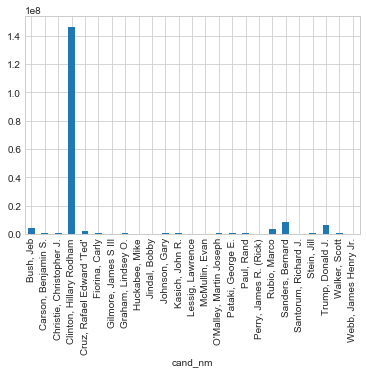

In [175]:
total_cand_sum.plot(kind='bar')

# Obama got the most donation because he is the only in the democrats pary

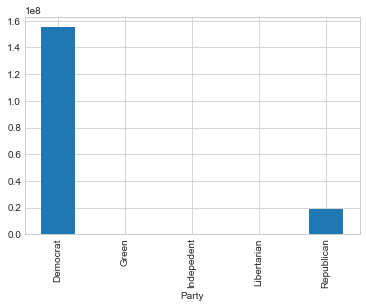

In [176]:
# donation of democrats vs republicans
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')


In [177]:
occupations_df = donor_df.pivot_table('contb_receipt_amt', 
                                     index='contbr_occupation',
                                     columns='Party',
                                     aggfunc='sum')
occupations_df.head()

Party,Democrat,Green,Indepedent,Libertarian,Republican
contbr_occupation,,,,,
ADMINISTRATIVE ASSISTANT,150.0,NaN,NaN,NaN,NaN
ATTORNEY,290.0,NaN,NaN,NaN,NaN
CHARITY CONSULTANT,250.0,NaN,NaN,NaN,NaN
EDUCATOR,67.5,NaN,NaN,NaN,NaN
HEALTHCARE MANAGER,34.0,NaN,NaN,NaN,NaN


In [178]:
occupations_df.shape

# LARGE DF because there are a lot of diff. contribution

(17095, 5)

In [179]:
# The 1 represents bc we are adding the column
# and checking if the total sum of that occupation is greater than 1000000
# And only working with those occupation
occupations_df = occupations_df[occupations_df.sum(1) > 1000000]

In [180]:
occupations_df.shape

(15, 5)

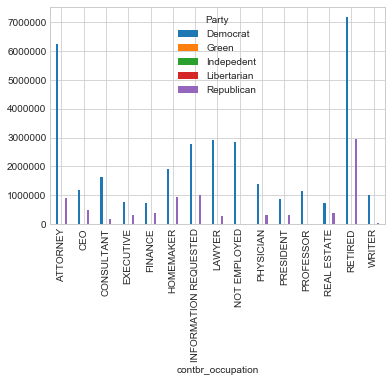

In [181]:
occupations_df.plot(kind='bar')
plt.show()

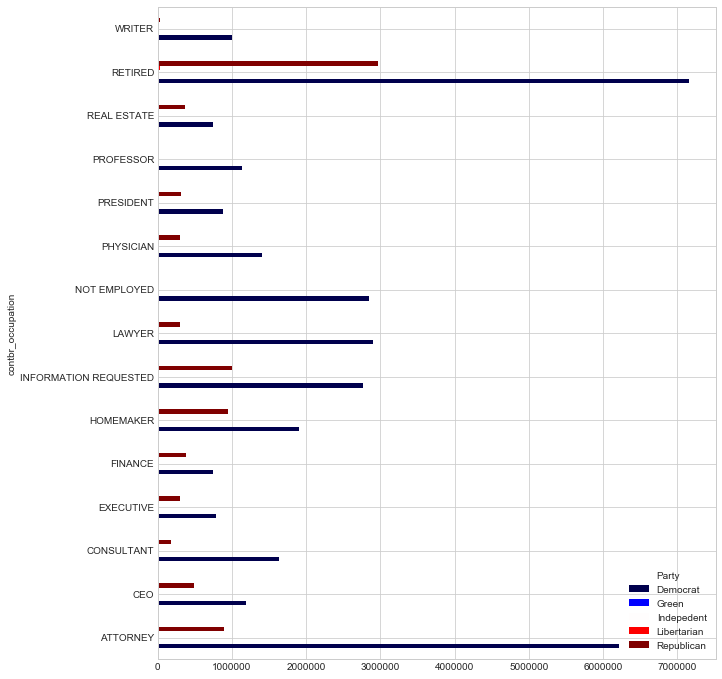

In [182]:
# horizontal graph and seismic plots the blue and red
occupations_df.plot(kind='barh',figsize=(10,12), cmap='seismic')
plt.show()

# FIX the Information columns as they are like an NA


In [183]:
# removing the info. columns
occupations_df.drop(['INFORMATION REQUESTED'], axis=0, inplace=True) # columns

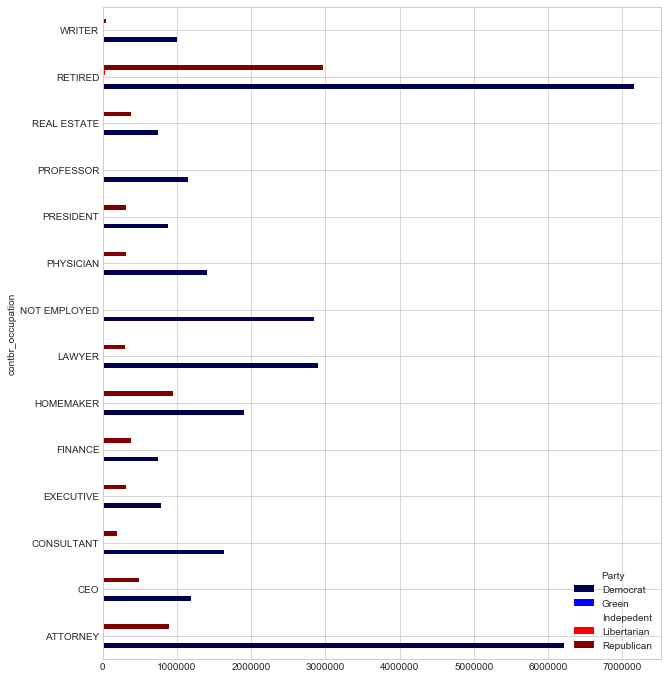

In [184]:
# horizontal graph
occupations_df.plot(kind='barh',figsize=(10,12), cmap='seismic')
plt.show()

For more on general data analysis of politics, I highly suggest the https://fivethirtyeight.com/politics/ website!

